# Task 1

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# Load the MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)

# Define the Softmax Regression model (Linear Model)
class SoftmaxRegression(nn.Module):
    def __init__(self):
        super(SoftmaxRegression, self).__init__()
        self.fc = nn.Linear(28 * 28, 10)  # 28x28 input size, 10 output classes

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the image to a vector
        return self.fc(x)  # Linear output

# Initialize the model, loss function, and optimizer
model = SoftmaxRegression().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# Training Loop
epochs = 5
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f'Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}, Accuracy: {100 * correct / total:.2f}%')

# Testing the model
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Test Accuracy: {100 * correct / total:.2f}%')


Epoch [1/5], Loss: 0.3618, Accuracy: 89.34%
Epoch [2/5], Loss: 0.3064, Accuracy: 91.28%
Epoch [3/5], Loss: 0.2978, Accuracy: 91.62%
Epoch [4/5], Loss: 0.2913, Accuracy: 91.87%
Epoch [5/5], Loss: 0.2869, Accuracy: 91.88%
Test Accuracy: 91.75%


# Task 2

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Load the MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)

# Define a simple neural network model
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)  # First hidden layer
        self.fc2 = nn.Linear(128, 10)       # Output layer

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the image
        x = torch.relu(self.fc1(x))  # ReLU activation
        x = self.fc2(x)  # Output layer (no activation needed for CrossEntropyLoss)
        return x

# Initialize the model, loss function, and optimizer
model = SimpleNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training Loop
epochs = 5
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f'Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}, Accuracy: {100 * correct / total:.2f}%')

# Testing the model
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Test Accuracy: {100 * correct / total:.2f}%')


Epoch [1/5], Loss: 0.2557, Accuracy: 92.48%
Epoch [2/5], Loss: 0.1081, Accuracy: 96.82%
Epoch [3/5], Loss: 0.0775, Accuracy: 97.63%
Epoch [4/5], Loss: 0.0571, Accuracy: 98.21%
Epoch [5/5], Loss: 0.0458, Accuracy: 98.54%
Test Accuracy: 97.79%


# Task 3

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt


# Define the CNN model
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(256*4*4, 1024)  # CIFAR10 images are 32x32, after conv, size becomes 4x4
        self.fc2 = nn.Linear(1024, 10)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.max_pool2d(x, 2)  # Max pool with 2x2 filter
        x = torch.relu(self.conv2(x))
        x = torch.max_pool2d(x, 2)
        x = torch.relu(self.conv3(x))
        x = torch.max_pool2d(x, 2)
        x = x.view(-1, 256*4*4)  # Flatten the tensor
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x


Files already downloaded and verified
Files already downloaded and verified
Epoch 1/20, Loss: 1.3339, Train Accuracy: 51.53%, Test Accuracy: 64.65%
Epoch 2/20, Loss: 0.9155, Train Accuracy: 67.63%, Test Accuracy: 72.78%
Epoch 3/20, Loss: 0.7504, Train Accuracy: 73.53%, Test Accuracy: 74.48%
Epoch 4/20, Loss: 0.6596, Train Accuracy: 76.77%, Test Accuracy: 77.05%
Epoch 5/20, Loss: 0.5812, Train Accuracy: 79.58%, Test Accuracy: 77.27%
Epoch 6/20, Loss: 0.5262, Train Accuracy: 81.45%, Test Accuracy: 78.75%
Epoch 7/20, Loss: 0.4713, Train Accuracy: 83.56%, Test Accuracy: 79.26%
Epoch 8/20, Loss: 0.4269, Train Accuracy: 85.05%, Test Accuracy: 79.54%
Epoch 9/20, Loss: 0.3872, Train Accuracy: 86.43%, Test Accuracy: 79.72%
Epoch 10/20, Loss: 0.3476, Train Accuracy: 87.87%, Test Accuracy: 79.79%
Epoch 11/20, Loss: 0.3195, Train Accuracy: 88.84%, Test Accuracy: 80.03%
Epoch 12/20, Loss: 0.2931, Train Accuracy: 89.84%, Test Accuracy: 79.97%
Epoch 13/20, Loss: 0.2710, Train Accuracy: 90.66%, Test A

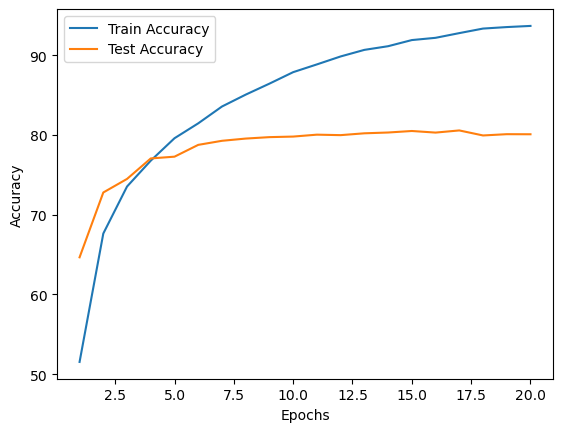

In [9]:
# Data augmentation and normalization for training, and just normalization for testing
transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load CIFAR-10 dataset
trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)

trainloader = DataLoader(trainset, batch_size=64, shuffle=True)
testloader = DataLoader(testset, batch_size=64, shuffle=False)


# Instantiate the model, loss function, and optimizer
model = CNNModel()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the CNN model
num_epochs = 20
train_accuracies = []
test_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for inputs, labels in trainloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()
    
    # Evaluate on the test set
    model.eval()
    correct_test = 0
    total_test = 0
    with torch.no_grad():
        for inputs, labels in testloader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()

    train_accuracy = 100 * correct_train / total_train
    test_accuracy = 100 * correct_test / total_test
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(trainloader):.4f}, Train Accuracy: {train_accuracy:.2f}%, Test Accuracy: {test_accuracy:.2f}%")

# Plot the accuracy curves
plt.plot(range(1, num_epochs+1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, num_epochs+1), test_accuracies, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
